In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
## Importing the Libraries

import pandas as pd ## pandas is used to manupulate the dataframe
import numpy as np ## numpy is used to do scientific calculations
import matplotlib.pyplot as plt ## matplotlib used for visualization
import seaborn as sns ## seaborn used for visualization 
import missingno as msno ## used to visualize missing values
import warnings ## used to remove warnings
warnings.filterwarnings('ignore')

In [3]:
## Importing the data

data=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [4]:
## Getting the data

data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


###### There are 1460 rows and 81 columns in this dataset

In [5]:
## Basic Checks

data.head()  ## getting first five rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.tail() ## getting last five rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
data.describe() ## getting the descriptive satistical  details 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
data.info() ## getting the information from the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
## checking if there is any duplicate data

data.duplicated().sum()

0

###### There is no duplicate data

In [10]:
## Analysing if there is any null values

pd.options.display.max_rows=None ## shows all the rows
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

###### We have null values in the dataset
###### There are 19 columns with null values

In [11]:
#pd.reset_option('max_columns')
pd.reset_option('max_rows')

# Handling the missing values and Feature selection

###### Handling missing values for LotFrontage



In [12]:
data.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

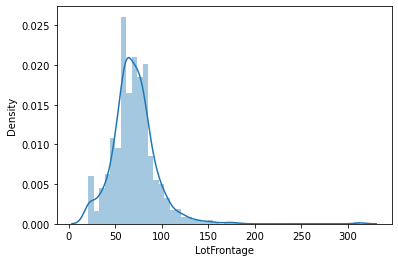

In [13]:
## distribution plot for LotFrontage
 
sns.distplot(data.LotFrontage)
plt.show()

In [14]:
data['LotFrontage'].mean()  ## getting the mean

70.04995836802665

In [15]:
## Checking the percentage of missing values for LotFrontage

print('The Percentage of data missing in LotFrontage is ',data.LotFrontage.isnull().sum()/len(data)*100)

The Percentage of data missing in LotFrontage is  17.73972602739726


In [16]:
data.loc[data['LotFrontage'].isnull()==True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000


In [17]:
## Replacing the nan values with mean for LotFrontage

data.loc[data['LotFrontage'].isnull()==True,'LotFrontage']=70.0

###### Handling the missing values for Alley,PoolQC,Fence,MiscFeature


In [18]:
## Percentage of missing values in Alley,PoolQC,Fence,MiscFeature
 
d1=data[['Alley','PoolQC','Fence','MiscFeature']]
a=d1.isnull().sum()/len(d1)*100
a


Alley          93.767123
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

##### More than 80% of the data are missing in Alley,PoolQC,Fence,MiscFeature

In [19]:
## removing the features

data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

###### Handling the missing values for BsmtQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2

In [20]:
## Percentage of missing values

d2=data[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]
b=d2.isnull().sum()/len(d2)*100
b

BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
dtype: float64

In [21]:
## Replacing the missing values with 'NA'

data['BsmtQual']=data['BsmtQual'].fillna('NA')
data['BsmtCond']=data['BsmtCond'].fillna('NA')
data['BsmtExposure']=data['BsmtExposure'].fillna('NA')
data['BsmtFinType1']=data['BsmtFinType1'].fillna('NA')
data['BsmtFinType2']=data['BsmtFinType2'].fillna('NA')


###### Replacing missing values for MasVnrType

In [22]:
data.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [23]:
## Replacing the missing values with mode

data.loc[data['MasVnrType'].isnull()==True,'MasVnrType']='None'

In [24]:
###### Replacing missing values for MasVnrArea

<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

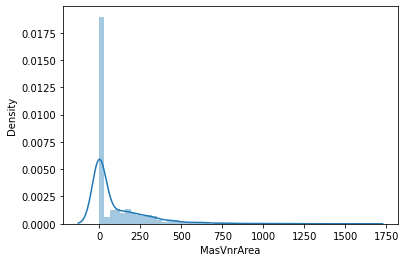

In [25]:
 sns.distplot(data.MasVnrArea)

In [26]:
## Finding the median

data['MasVnrArea'].median()

0.0

In [27]:
## Replacing the missing value by median
data.loc[data['MasVnrArea'].isnull()==True,'MasVnrArea']=0.0

###### Handling missing values for GarageType,GarageFinish,GarageQual,GarageCond 

In [28]:
## Percentage of missing values
d3=data[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond' ]]
c=d3.isnull().sum()/len(d3)*100
c


GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64

In [29]:
## Replacing the missing values for GarageType,GarageFinish,GarageQual,GarageCond  by NA

data['GarageType']=data['GarageType'].fillna('NA')
data['GarageFinish']=data['GarageFinish'].fillna('NA')
data['GarageQual']=data['GarageQual'].fillna('NA')
data['GarageCond']=data['GarageCond'].fillna('NA')



###### Handling the missing value for GarageYrBlt

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

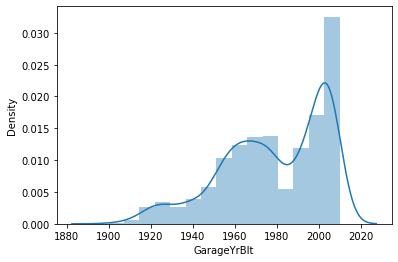

In [30]:
sns.distplot(data.GarageYrBlt)

In [31]:
data.GarageYrBlt.median()

1980.0

In [32]:
data.loc[data['GarageYrBlt'].isnull()==True,'GarageYrBlt']=1980.0

###### Handling the missing value for Electrical          

In [33]:
data.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [34]:
## Replacing the null values with mode
data.loc[data['Electrical'].isnull()==True,'Electrical']='SBrkr'

###### Handling the missing values for FireplaceQu

In [35]:
data.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [36]:
## Replacing the missing values with NA
data.loc[data['FireplaceQu'].isnull()==True,'FireplaceQu']='NA'

In [37]:
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

###### There is no null values now.We have cleared all the null values.

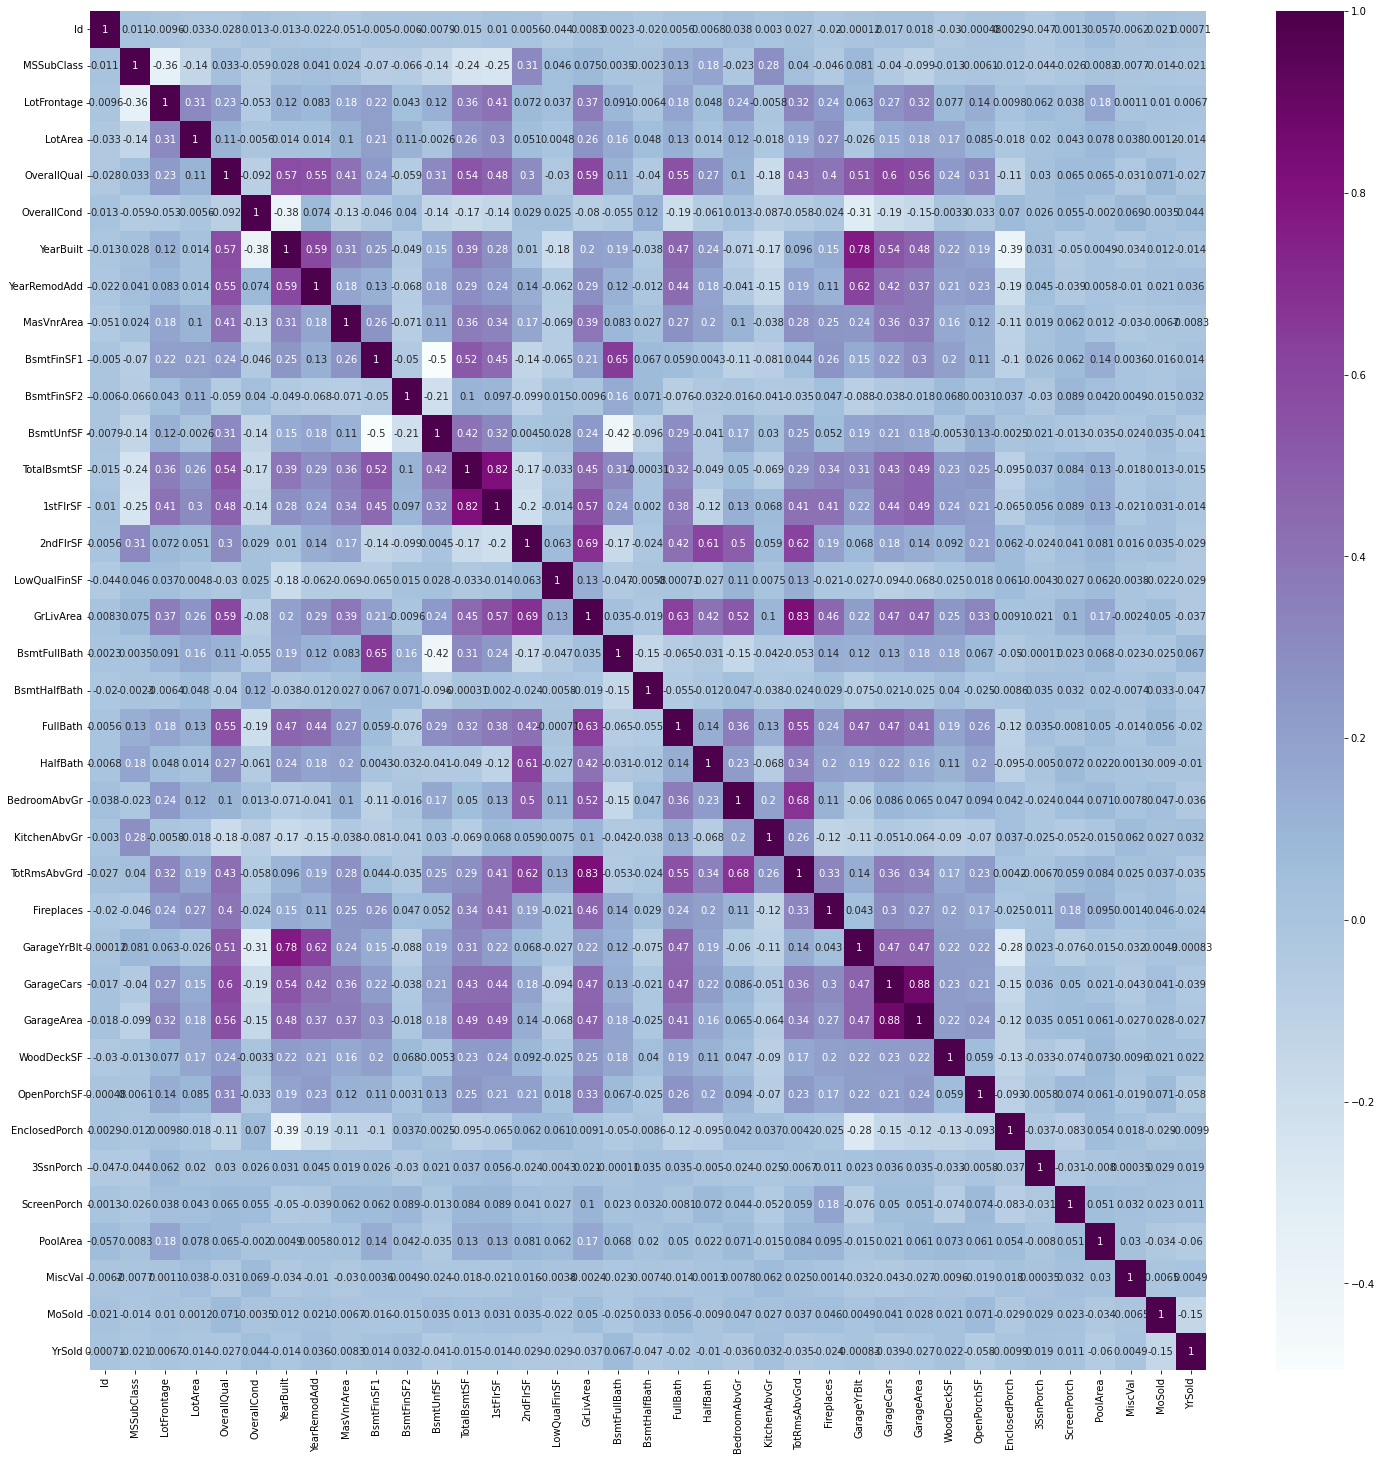

In [38]:
plt.figure(figsize=(25,25))
sns.heatmap(data.drop('SalePrice',axis=1).corr(),cmap="BuPu",annot=True)
plt.show()

# Exploratory Data Analysis

### Univarient Analysis

In [39]:
## Getting the features with object datatype
dtype_objects = list(columns for columns in data.select_dtypes([object]).columns)


In [40]:
dtype_objects

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [41]:
len(dtype_objects)

39

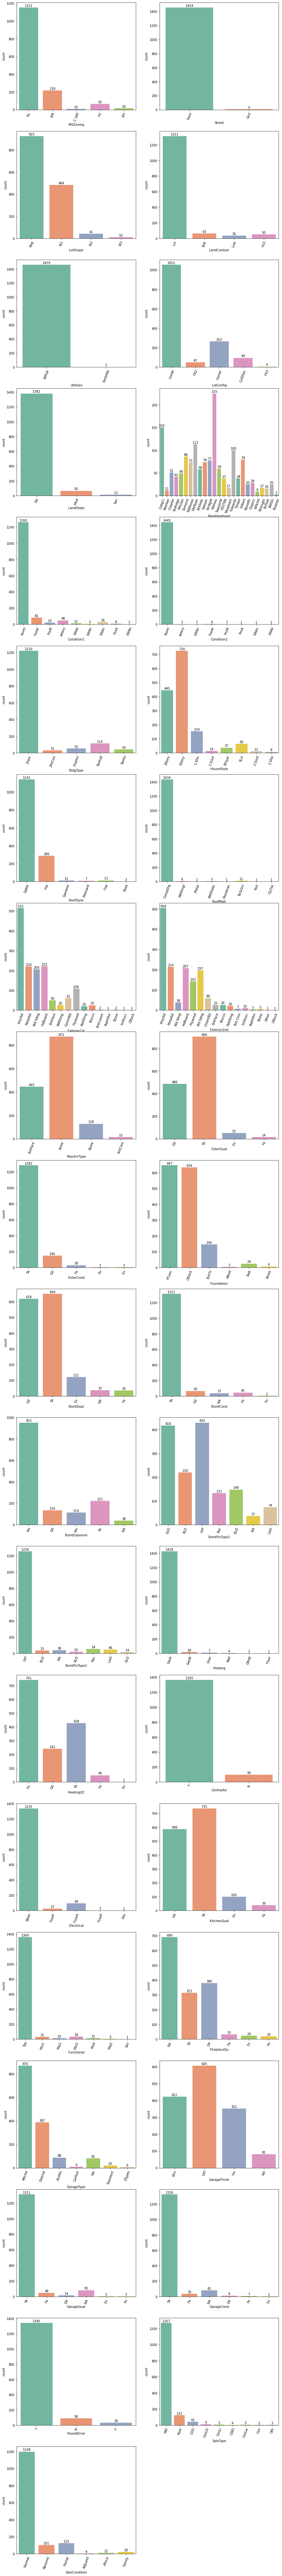

In [42]:
## countplot for datatype with objects

plt.figure(figsize=(15,150))
plotnumber=1
for c in dtype_objects:
    ax=plt.subplot(20,2,plotnumber)
    b= sns.countplot(x=data[c],palette='Set2')
    plt.xticks(rotation=70)
    plotnumber+=1
    for bar in b.patches:
        b.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=10, xytext=(0, 6),textcoords='offset points')
plt.show() 

###### Count plot for the datatype object has been plotted

In [43]:
## Getting the features with float datatype

dtype_float =list(columns for columns in data.select_dtypes([float]).columns)

In [44]:
dtype_float

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

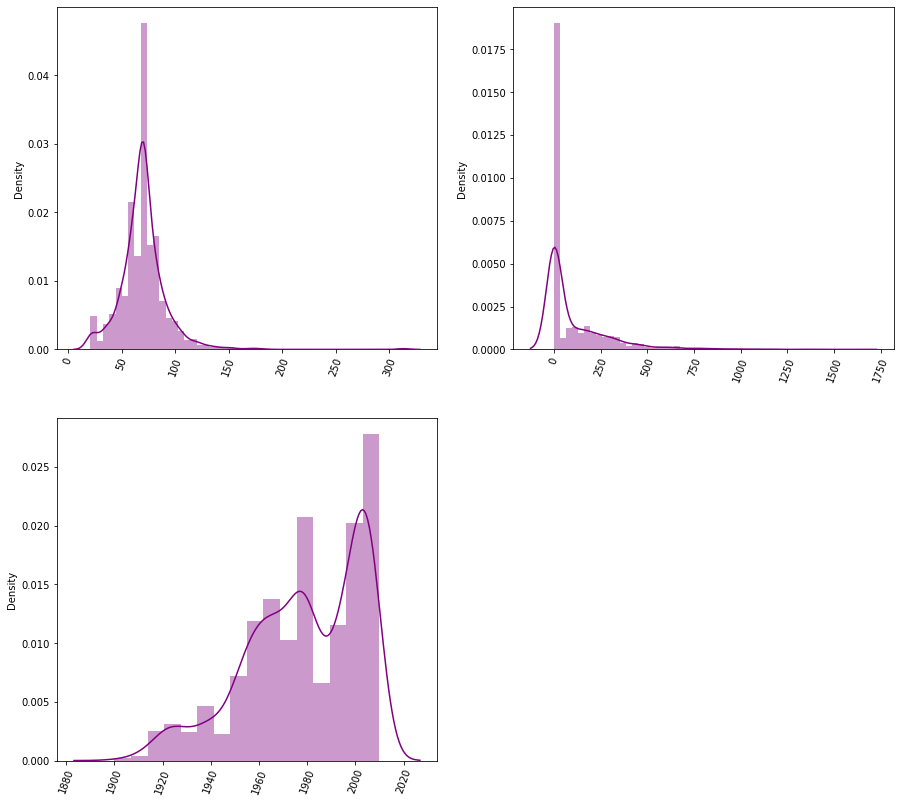

In [45]:
## Distribution plot 

plt.figure(figsize=(15,150))
plotnumber=1
for a in dtype_float:
    ax=plt.subplot(20,2,plotnumber)
    sns.distplot(x=data[a],color='purple')
    plt.xticks(rotation=70)
    plotnumber+=1
plt.show() 

###### From the graph LotFrontage gives normal distribution but MasVnrArea and GarageYrBlt is skewed

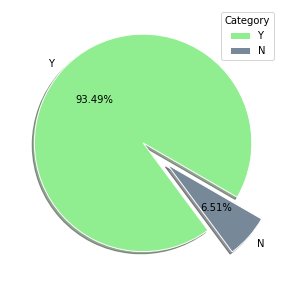

In [46]:
## Pie plot for CentralAir

plt.figure(figsize=(5,5))
labels=['Y','N']
size=data['CentralAir'].value_counts()
colors=['lightgreen','lightslategray']
explode=[0,0.3]
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%.2f%%',shadow = True,startangle = -30,
wedgeprops= {'edgecolor':'white','linewidth':1})
plt.legend(labels,loc="upper right",title='Category') ## used to label at the side
plt.show()

###### From the graph 93.49% houses has CentralAir and 6.51% houses has no CentralAir

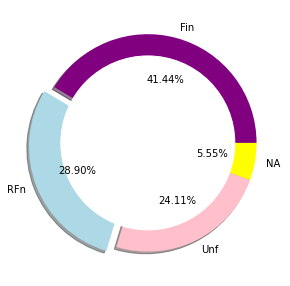

In [47]:
## Donut chart for GarageFinish

plt.figure(figsize=(5,5))
labels=['Fin','RFn','Unf','NA']
size=data['GarageFinish'].value_counts()
colors=['purple','lightblue','pink','yellow']
explode=[0,0.1,0,0]
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%.2f%%',shadow=True)
circle = plt.Circle( (0,0),0.8, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

###### From the graph for 41.44% of the houses the interior finish of the garage is finished.

# **Bivarient and Multivarient Analysis**

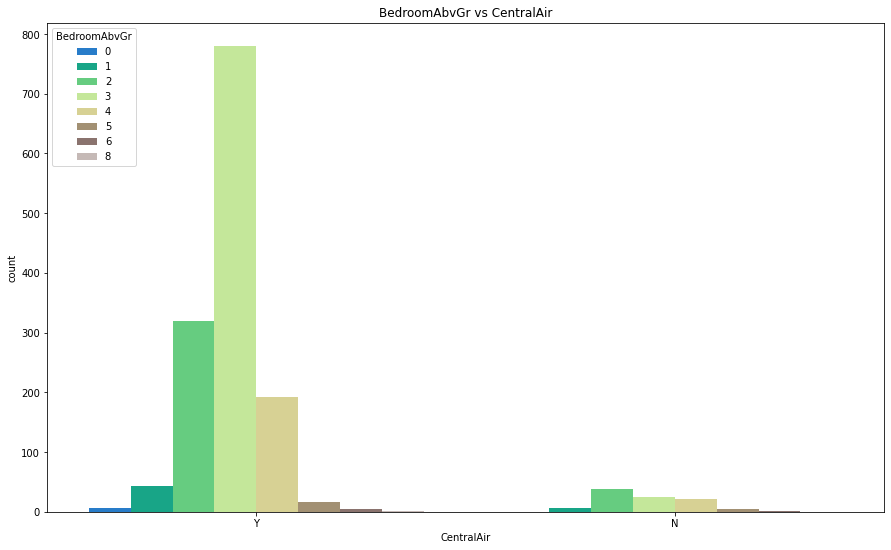

In [48]:
## Countplot for CentralAir and BedroomAbvGr

plt.figure(figsize=(15,9))
sns.countplot(x='CentralAir',hue='BedroomAbvGr',palette='terrain',data=data).set(title="BedroomAbvGr vs CentralAir")
plt.show()

### The houses with 3 bedrooms has more central air conditioning than others.

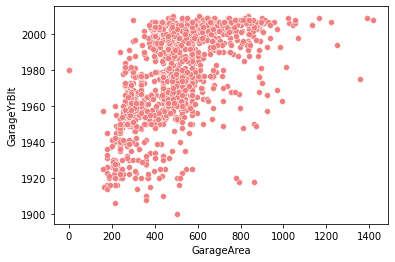

In [49]:
## Scatter plot for GarageArea and GarageYrBlt

sns.scatterplot(x='GarageArea',y='GarageYrBlt',data=data,color='lightcoral')
plt.show()

**We can see there are some outliers present while comparing garage area and garage year built**

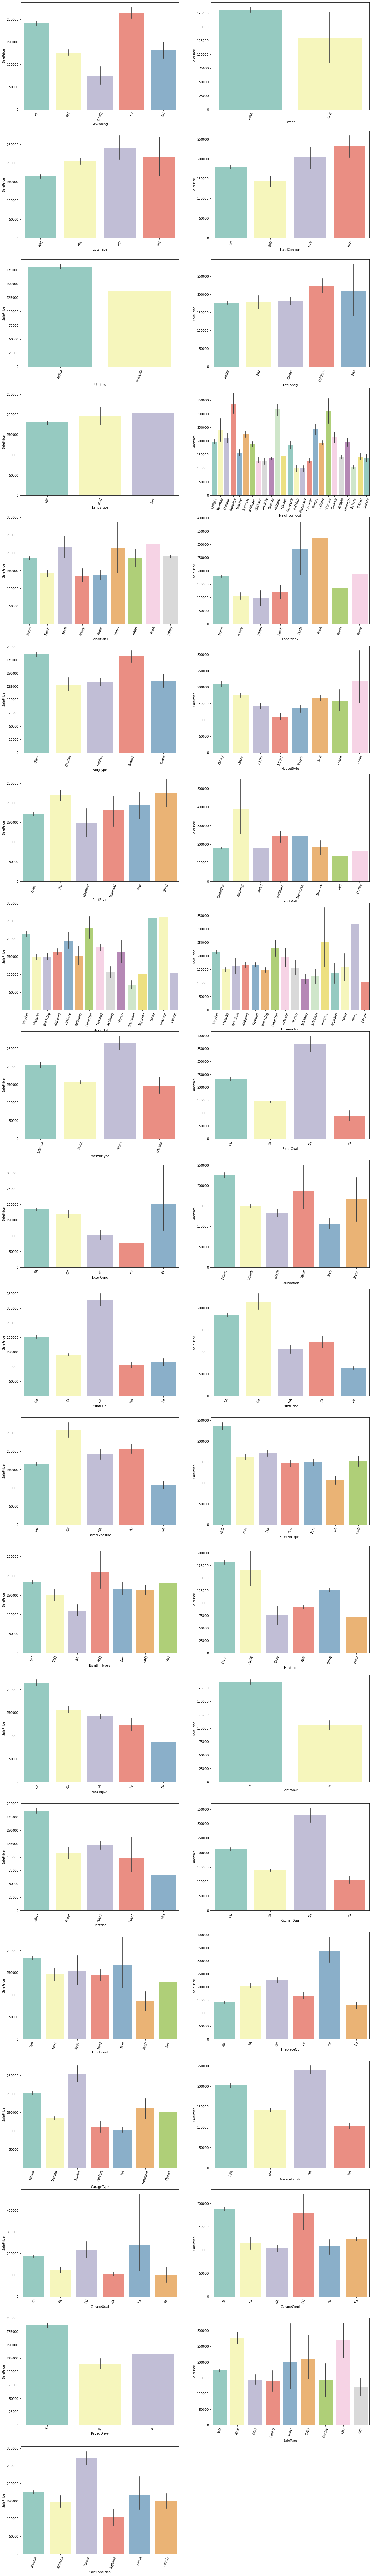

In [50]:
## barplot for saleprice and the data type with objects

plt.figure(figsize=(20,150),facecolor='white')
plotnumber=1
for c in dtype_objects:
    ax=plt.subplot(20,2,plotnumber)
    sns.barplot(x=data[c],y=data.SalePrice,palette='Set3')
    plotnumber+=1
    plt.xticks(rotation=70)
plt.show() 

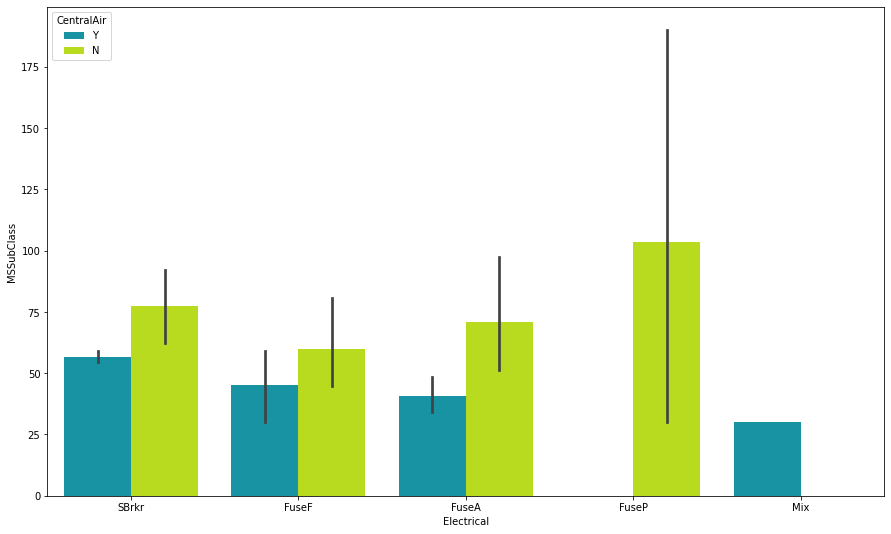

In [51]:
## bar plot for Electrical,MSSubClass,CentralAir

plt.figure(figsize=(15,9))
splot=sns.barplot(x='Electrical',y='MSSubClass',hue='CentralAir',palette='nipy_spectral',data=data)
plt.show()

**Building with 2-STORY 1946 & NEWER and Standard Circuit Breakers & Romex use more central air conditioning than others.**

In [52]:
## Getting the continuous data features

box=data[['LotArea','YearBuilt','BsmtFinSF1','1stFlrSF','2ndFlrSF','LotFrontage', 'MasVnrArea', 'GarageYrBlt']]

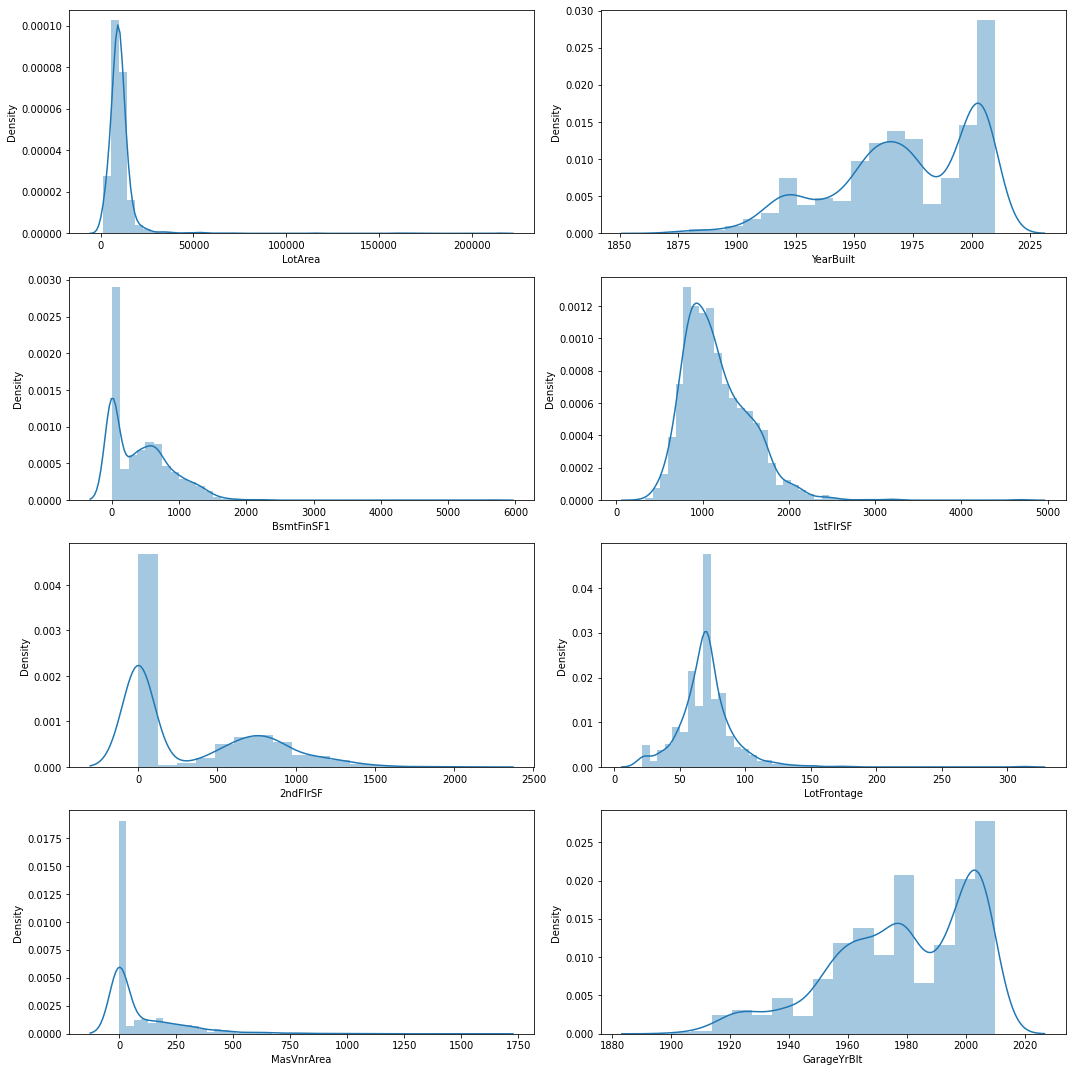

In [53]:
plt.figure(figsize=(15,15),facecolor='white')

plotnum=1 #counter

for c in box:
    if(plotnum<9):
        a=plt.subplot(4,2,plotnum)#plotting 8 graph
        sns.distplot(box[c])#to know distribution
    plotnum+=1#increment counter
plt.tight_layout()   

# Finding the outliers

In [54]:
## getting the continuous data features

box=data[['LotArea','YearBuilt','BsmtFinSF1','1stFlrSF','2ndFlrSF','LotFrontage', 'MasVnrArea', 'GarageYrBlt']]

In [55]:
box

,LotArea,YearBuilt,BsmtFinSF1,1stFlrSF,2ndFlrSF,LotFrontage,MasVnrArea,GarageYrBlt
0,8450,2003,706,856,854,65.0,196.0,2003.0
1,9600,1976,978,1262,0,80.0,0.0,1976.0
2,11250,2001,486,920,866,68.0,162.0,2001.0
3,9550,1915,216,961,756,60.0,0.0,1998.0
4,14260,2000,655,1145,1053,84.0,350.0,2000.0
...,...,...,...,...,...,...,...,...
1455,7917,1999,0,953,694,62.0,0.0,1999.0
1456,13175,1978,790,2073,0,85.0,119.0,1978.0
1457,9042,1941,275,1188,1152,66.0,0.0,1941.0
1458,9717,1950,49,1078,0,68.0,0.0,1950.0


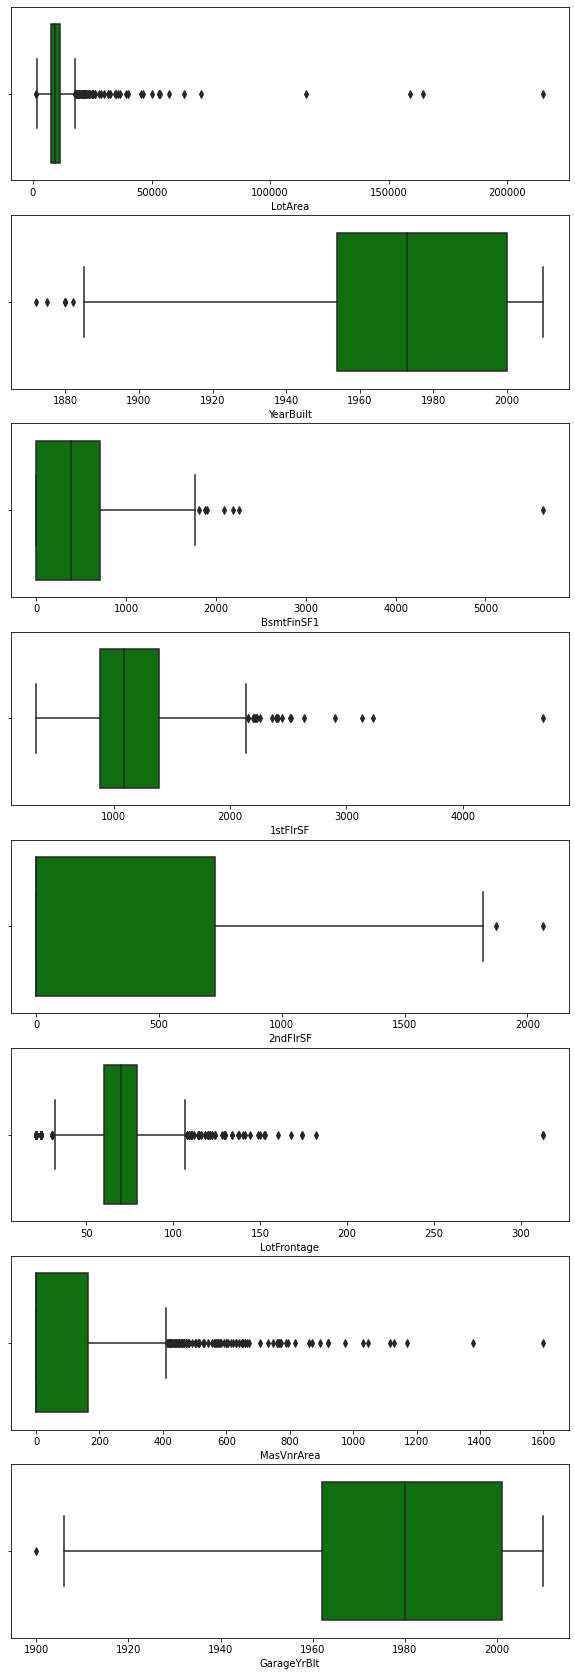

In [56]:
## boxplot to find the outliers

plt.figure(figsize=(10,30),facecolor='white')
plotnumber=1
for c in box:
    ax=plt.subplot(8,1,plotnumber)
    sns.boxplot(data[c],color='green')
    plotnumber=plotnumber + 1 
plt.show()

# Handling the skewness

In [57]:
from scipy.stats import skew

numerical_features = data.dtypes[data.dtypes != 'object'].index

# checking the skewness in all the numerical features
skewed_features = data[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_features})

# checking the head of skewness dataset
skewness

,skew
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186
EnclosedPorch,3.086696


In [58]:
##applying box-cox transformations

skewness = skewness[abs(skewness > 0.8)]

# printing how many features are to be box-cox transformed
print("There are {} skewed numerical features to box cox transform".format(skewness.shape[0]))

# importing box-cox1p
from scipy.special import boxcox1p

# defining skewed features
skewed_features = skewness.index

lamda = 0.15
for features in skewed_features:
    data[features] += 1
    data[features] = boxcox1p(data[features], lamda)
data[skewed_features] = np.log1p(data[skewed_features])
print('Skewness has been Handled using Box Cox Transformation')

There are 38 skewed numerical features to box cox transform
Skewness has been Handled using Box Cox Transformation


### Changing categorical data to numerical data

In [59]:
#getting all the categorical feature

data_object = data.select_dtypes(include = "object").columns
print (data_object)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [60]:
#Label Encoding to convert categorical data to numerical data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for features in data_object:
    data[features] = le.fit_transform(data[features].astype(str))

print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   float64
 17  OverallCond    1460 non-null   float64
 18  YearBuil

# Feature Scaling

In [61]:
## Scaling the features
## Spliting the variables

x=data.drop(['Id','SalePrice'],axis=1) ## all the features
y=data['SalePrice']  ## target variable

In [62]:
#using minmax scaler to scale all the datas

from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler()
scaled_x=mc.fit_transform(x)

## **Model Creation**

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.20,random_state=0)

print("Traning Shape = ",x_train.shape)  ## number of rows and columns  given for training
print('Testing Shape = ',x_test.shape)  ## number of row and columns given for testing

Traning Shape =  (1168, 75)
Testing Shape =  (292, 75)


# **Model Evaluation**
## Linear Regression

In [64]:
## importing the library

from sklearn.linear_model import LinearRegression

In [65]:
LR=LinearRegression()
LR.fit(x_train,y_train)  ## fitting the training data

x_test_pred_LR=LR.predict(x_test)  ## predicted x test

In [66]:
x_test_pred_LR

array([3.56897725, 3.55147017, 3.48312596, 3.59309125, 3.44246724,
       3.43953742, 3.62147406, 3.51073026, 3.73887512, 3.54417511,
       3.57147223, 3.44675168, 3.60910685, 3.48533136, 3.5052377 ,
       3.51417751, 3.608123  , 3.4894463 , 3.51240835, 3.54150706,
       3.50677579, 3.5299202 , 3.44384625, 3.53643732, 3.57754658,
       3.57146672, 3.54539604, 3.41824491, 3.67620012, 3.47399716,
       3.5173215 , 3.60075491, 3.5280306 , 3.64214582, 3.6574771 ,
       3.58138928, 3.64814579, 3.4899916 , 3.59972737, 3.66067605,
       3.60824658, 3.4998351 , 3.58565824, 3.64968961, 3.66924486,
       3.52068938, 3.38025539, 3.49069776, 3.56092809, 3.44788387,
       3.69727556, 3.52727339, 3.55006325, 3.42143794, 3.61955837,
       3.46587025, 3.49081833, 3.6018098 , 3.5159465 , 3.45559172,
       3.51589214, 3.49815392, 3.51100109, 3.5366745 , 3.59483603,
       3.54515097, 3.50901047, 3.58613986, 3.49589468, 3.5897566 ,
       3.57998057, 3.53641453, 3.39194262, 3.61742429, 3.42772

In [67]:
y_test ## tested y

529     3.582128
491     3.510390
459     3.477006
279     3.574495
655     3.437557
          ...   
326     3.664899
440     3.756824
1387    3.514301
1323    3.426103
61      3.461943
Name: SalePrice, Length: 292, dtype: float64

In [68]:
x_train_pred_LR=LR.predict(x_train) ##predicted x train

x_train_pred_LR

array([3.66490891, 3.45100289, 3.51392298, ..., 3.51449707, 3.57409817,
       3.58299865])

In [69]:
y_train  ## trained y

618     3.659957
870     3.476203
92      3.546510
817     3.634158
302     3.585874
          ...   
763     3.671654
835     3.503666
1216    3.480181
559     3.608801
684     3.598905
Name: SalePrice, Length: 1168, dtype: float64

In [70]:
print('Linear Regression trainind score is',LR.score(x_train,y_train))

Linear Regression trainind score is 0.9112461405416294


In [71]:
print('Linear Regression testing score is',LR.score(x_test,y_test))

Linear Regression testing score is 0.8048949881798664


# Evaluation Metrics for Linear Regression

In [72]:
from sklearn.metrics import r2_score
train_score=r2_score(y_train,x_train_pred_LR)
print('Linear Regression r2_score for training is',train_score)

Linear Regression r2_score for training is 0.9112461405416294


In [73]:
test_score=r2_score(y_test,x_test_pred_LR)
print('Linear Regression r2_score for testing is',test_score)

Linear Regression r2_score for testing is 0.8048949881798664


#### Training score is more than testing score so the model is underfitting.

# Random Forest Regressor

In [74]:
## Importing the library

from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train) ## fitting the data

x_test_pred_RF=RF.predict(x_test)  ## predicted x test

In [75]:
x_test_pred_RF

array([3.58176657, 3.52048702, 3.47726408, 3.60187667, 3.43888587,
       3.4678096 , 3.6185025 , 3.49818311, 3.74604879, 3.53730336,
       3.58485231, 3.51935382, 3.59845598, 3.49490414, 3.49800551,
       3.52736437, 3.60243937, 3.48404999, 3.51881277, 3.57740987,
       3.5064003 , 3.52295156, 3.48437627, 3.54701536, 3.56397059,
       3.58344723, 3.55198636, 3.43263234, 3.6556207 , 3.48946307,
       3.51258715, 3.58088408, 3.51856167, 3.64108622, 3.66752265,
       3.56426669, 3.63740984, 3.50193293, 3.60846655, 3.6572541 ,
       3.58922731, 3.50362358, 3.56507205, 3.64395187, 3.66357768,
       3.51938491, 3.50360512, 3.4994044 , 3.54951315, 3.46067234,
       3.67871545, 3.52690373, 3.55100922, 3.44610092, 3.62041057,
       3.4773134 , 3.50094926, 3.61499816, 3.51839253, 3.47156372,
       3.5249988 , 3.50678111, 3.525094  , 3.53451191, 3.57882676,
       3.54272224, 3.49197306, 3.59217941, 3.49904966, 3.56879753,
       3.56394663, 3.49512906, 3.42438955, 3.60509723, 3.44131

In [76]:
y_test   ## y test

529     3.582128
491     3.510390
459     3.477006
279     3.574495
655     3.437557
          ...   
326     3.664899
440     3.756824
1387    3.514301
1323    3.426103
61      3.461943
Name: SalePrice, Length: 292, dtype: float64

In [77]:
x_train_pred_RF=LR.predict(x_train)  ## predicted x train
x_train_pred_RF

array([3.66490891, 3.45100289, 3.51392298, ..., 3.51449707, 3.57409817,
       3.58299865])

In [78]:
y_train  ## y train

618     3.659957
870     3.476203
92      3.546510
817     3.634158
302     3.585874
          ...   
763     3.671654
835     3.503666
1216    3.480181
559     3.608801
684     3.598905
Name: SalePrice, Length: 1168, dtype: float64

### Random Foresr Regressor Score

In [79]:
print('Training score for Random Forest Regressor is',RF.score(x_train,y_train))

Training score for Random Forest Regressor is 0.9809375498767964


In [80]:
print('Testing score for Random Forest Regressor is',RF.score(x_test,y_test))

Testing score for Random Forest Regressor is 0.8785782113729315


Testing score for Random Forest Regressor is 0.8734354150958835

**Training score is more than Testing score,so the Random Forest Regressor model is underfitting.So we can do hyper parametric tuning.**

# Hyper parametric Tuning -- Random Forest Regressor

In [81]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'n_estimators': [100,200,300,400,500,600],  ## no. of trees
               'max_features': ['auto', 'sqrt'],  
               'max_depth': [10, 15,20,25], ## maxinum number of levels in trees 
               'min_samples_split':  [2, 5, 10], ## minimum number of samples required to split a node
               'min_samples_leaf': [1, 2, 4], ## Minimum number of samples required at each leaf node
               'bootstrap': [True, False]}  ##  Method of selecting samples for training each tree

In [82]:
hyper_tuning=RandomizedSearchCV(estimator=RF,param_distributions=random_grid,n_iter=10,cv=5,verbose=5,random_state=2)

In [83]:
hyper_tuning.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.908 total time=   1.2s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.828 total time=   1.2s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.849 total time=   1.2s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.882 total time=   1.2s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.878 total time=   1.2s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.908 total time=   0.5s
[CV 2/5] END boo

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600]},
                   random_state=2, verbose=5)

In [84]:
hyper_tuning.best_params_  ## getting the best parameters

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [85]:
RF_hyper_tuning=RandomForestRegressor(n_estimators=600,min_samples_split=2,min_samples_leaf= 1,max_features='sqrt',max_depth=30,bootstrap= False)  ## implementing the best parameters

In [86]:
RF_hyper_tuning.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      n_estimators=600)

In [87]:
RF_hyper_pred_test=RF_hyper_tuning.predict(x_test) ## predicted hyperparametric tuning x test

RF_hyper_pred_test

array([3.59348302, 3.51768653, 3.49065985, 3.58653157, 3.44866315,
       3.47384972, 3.61406369, 3.49962632, 3.73830727, 3.53443338,
       3.58161579, 3.52725824, 3.60324879, 3.50355612, 3.5006287 ,
       3.52402044, 3.6017023 , 3.46853966, 3.51542231, 3.54749295,
       3.50202153, 3.52606827, 3.4789866 , 3.54756691, 3.57252395,
       3.58466563, 3.55606382, 3.42418565, 3.66428537, 3.48523397,
       3.51805068, 3.5816836 , 3.52135105, 3.6475235 , 3.66377861,
       3.56405333, 3.63443563, 3.50166103, 3.60792623, 3.65050633,
       3.59282102, 3.51084319, 3.56351199, 3.65495191, 3.66318965,
       3.52282915, 3.5002863 , 3.50287563, 3.55081159, 3.47250586,
       3.68061108, 3.52511911, 3.55190241, 3.42721205, 3.6081827 ,
       3.48431958, 3.49887502, 3.60868025, 3.5159747 , 3.47119986,
       3.5255269 , 3.5114565 , 3.52697176, 3.53851496, 3.59246054,
       3.5352691 , 3.50231264, 3.59742549, 3.50938675, 3.5773284 ,
       3.56305622, 3.49176529, 3.43865973, 3.59740296, 3.44632

In [88]:
RF_hyper_pred_train=RF_hyper_tuning.predict(x_train)  ## predicted hyper parametric tuning x train

RF_hyper_pred_train

array([3.65995718, 3.47620275, 3.54651016, ..., 3.48018103, 3.60880129,
       3.5989052 ])

### Score after Random Forest Regressor Hyper Parametric Tuning

In [89]:
print('Training score for Random Forest Regressor Hyper Parametric Tuning is ',RF_hyper_tuning.score(x_train,y_train))

Training score for Random Forest Regressor Hyper Parametric Tuning is  0.9999999999917596


In [90]:
print('Testing score for Random Forest Regressor Hyper Parametric Tuning is ',RF_hyper_tuning.score(x_test,y_test))

Testing score for Random Forest Regressor Hyper Parametric Tuning is  0.8856015780152183


# Decision Tree Regressor

In [91]:
## Importing the library

from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [92]:
x_test_pred_DT=DT.predict(x_test) ## predicted x test

x_test_pred_DT  ## predicted x test

array([3.49595036, 3.52732638, 3.49666629, 3.57975365, 3.40915073,
       3.47213013, 3.59169864, 3.51300751, 3.72186494, 3.56326756,
       3.57449452, 3.52260367, 3.59005468, 3.50826686, 3.48996415,
       3.50906614, 3.6046849 , 3.46018513, 3.53605689, 3.6322379 ,
       3.51494465, 3.52062772, 3.46368347, 3.56132211, 3.55885858,
       3.60823099, 3.55736315, 3.34357704, 3.66595644, 3.45929932,
       3.49950045, 3.57852038, 3.51812521, 3.64583408, 3.65501936,
       3.56326756, 3.6674773 , 3.5063872 , 3.59749612, 3.68762393,
       3.55228126, 3.50020172, 3.58062909, 3.62023614, 3.62249652,
       3.46863294, 3.5063872 , 3.5063872 , 3.56803594, 3.47620275,
       3.70223064, 3.54273314, 3.56317081, 3.41839824, 3.62727417,
       3.47700581, 3.48018103, 3.60581752, 3.50159571, 3.40915073,
       3.52969854, 3.51494465, 3.52851658, 3.54267857, 3.56990644,
       3.55020524, 3.51039005, 3.60421072, 3.51622398, 3.56614461,
       3.56326756, 3.46018513, 3.41150932, 3.56326756, 3.47377

In [93]:
y_test ## y test

529     3.582128
491     3.510390
459     3.477006
279     3.574495
655     3.437557
          ...   
326     3.664899
440     3.756824
1387    3.514301
1323    3.426103
61      3.461943
Name: SalePrice, Length: 292, dtype: float64

In [94]:
x_train_pred_DT=DT.predict(x_train)  ## predicted x train

x_train_pred_DT

array([3.65995718, 3.47620275, 3.54651016, ..., 3.48018103, 3.60880129,
       3.5989052 ])

In [95]:
y_train ## y train

618     3.659957
870     3.476203
92      3.546510
817     3.634158
302     3.585874
          ...   
763     3.671654
835     3.503666
1216    3.480181
559     3.608801
684     3.598905
Name: SalePrice, Length: 1168, dtype: float64

In [96]:
print('Training score for Decision Tree Regressor is',DT.score(x_train,y_train))

Training score for Decision Tree Regressor is 1.0


In [97]:
print('Testing score for Decision Tree Regressor is',DT.score(x_test,y_test))

Testing score for Decision Tree Regressor is 0.7484766027312202


### Training score is more than the Testing score,so the decision tree model is underfitting,So we can do hyper parametric tuning.

**Hyper parametric Tuning-- Decision Tree**

In [98]:
from sklearn.model_selection import RandomizedSearchCV

parameters={"splitter":["best","random"],
            "max_depth" : [2,4,6,8],
           "min_samples_leaf":[1,2,3,4,5,],
           "max_features":["auto","sqrt"],
           "max_leaf_nodes":[5,10,15] }


In [99]:
hyper_tuning_DT = RandomizedSearchCV(estimator=DT, param_distributions = parameters,
                               cv = 2, n_iter = 10, n_jobs=-1)

In [100]:
hyper_tuning_DT.fit(x_train, y_train)

RandomizedSearchCV(cv=2, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8],
                                        'max_features': ['auto', 'sqrt'],
                                        'max_leaf_nodes': [5, 10, 15],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'splitter': ['best', 'random']})

In [101]:
hyper_tuning_DT.best_params_

{'splitter': 'best',
 'min_samples_leaf': 1,
 'max_leaf_nodes': 10,
 'max_features': 'auto',
 'max_depth': 6}

In [102]:
hypertuning_DT = DecisionTreeRegressor(splitter= 'best',min_samples_leaf=5,max_leaf_nodes=15,max_features='sqrt',max_depth=6)

hypertuning_DT

DecisionTreeRegressor(max_depth=6, max_features='sqrt', max_leaf_nodes=15,
                      min_samples_leaf=5)

In [103]:
hypertuning_DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=6, max_features='sqrt', max_leaf_nodes=15,
                      min_samples_leaf=5)

In [104]:
DT_hyper_pred_xtest=hypertuning_DT.predict(x_test)

DT_hyper_pred_xtest

array([3.64833191, 3.54348628, 3.49838893, 3.57983462, 3.44510695,
       3.49838893, 3.61319124, 3.59690562, 3.64833191, 3.58347033,
       3.58347033, 3.50376133, 3.64833191, 3.49838893, 3.49838893,
       3.49838893, 3.57983462, 3.46632611, 3.49838893, 3.54348628,
       3.63802862, 3.50764837, 3.50764837, 3.49838893, 3.57983462,
       3.54501514, 3.58347033, 3.44510695, 3.67828616, 3.49838893,
       3.50376133, 3.57983462, 3.50764837, 3.64833191, 3.67828616,
       3.57983462, 3.58347033, 3.50764837, 3.57983462, 3.64833191,
       3.57983462, 3.54501514, 3.57983462, 3.67828616, 3.64833191,
       3.54348628, 3.50764837, 3.49838893, 3.57983462, 3.44510695,
       3.64833191, 3.50764837, 3.57983462, 3.46632611, 3.58347033,
       3.50764837, 3.44510695, 3.63802862, 3.50764837, 3.49838893,
       3.50764837, 3.49838893, 3.50764837, 3.50764837, 3.57983462,
       3.54501514, 3.49838893, 3.57983462, 3.57983462, 3.57983462,
       3.57983462, 3.49838893, 3.50764837, 3.57983462, 3.44510

In [105]:
y_test

529     3.582128
491     3.510390
459     3.477006
279     3.574495
655     3.437557
          ...   
326     3.664899
440     3.756824
1387    3.514301
1323    3.426103
61      3.461943
Name: SalePrice, Length: 292, dtype: float64

In [106]:
DT_hyper_pred_xtrain=hypertuning_DT.predict(x_train)

DT_hyper_pred_xtrain

array([3.64833191, 3.49838893, 3.50764837, ..., 3.50376133, 3.58347033,
       3.57983462])

In [107]:
y_train

618     3.659957
870     3.476203
92      3.546510
817     3.634158
302     3.585874
          ...   
763     3.671654
835     3.503666
1216    3.480181
559     3.608801
684     3.598905
Name: SalePrice, Length: 1168, dtype: float64

In [108]:
print('Training score for hyper parametric tuning of Decision tree regressor is',hypertuning_DT.score(x_train,y_train))

Training score for hyper parametric tuning of Decision tree regressor is 0.6952779456569078


In [109]:
print('Testing score for hyper parametric tuning of Decision tree regressor is',hypertuning_DT.score(x_test,y_test))

Testing score for hyper parametric tuning of Decision tree regressor is 0.6065116101303649


## Xtreme Gradient Boosting

In [110]:
from xgboost import XGBRegressor
XGB=XGBRegressor()
XGB.fit(x_train,y_train) 

xtest_XGB_pred=XGB.predict(x_test) ## predicted x test

In [111]:
xtest_XGB_pred

array([3.5820198, 3.5114045, 3.4925895, 3.5929124, 3.4345171, 3.4320536,
       3.5921497, 3.5001404, 3.6796596, 3.5273077, 3.5893724, 3.5363197,
       3.598947 , 3.5148222, 3.487078 , 3.5143309, 3.5889611, 3.4752567,
       3.5137627, 3.536986 , 3.4658773, 3.5270295, 3.4778779, 3.5283532,
       3.5674112, 3.5664856, 3.562598 , 3.4191873, 3.6711833, 3.472476 ,
       3.5058343, 3.5832803, 3.5320861, 3.6406114, 3.671451 , 3.5727317,
       3.642421 , 3.4987493, 3.5946996, 3.6632137, 3.6052349, 3.490423 ,
       3.5707936, 3.661258 , 3.6871603, 3.5103335, 3.504205 , 3.4972274,
       3.550511 , 3.4487011, 3.6953797, 3.5263755, 3.5545683, 3.4274979,
       3.6087992, 3.467673 , 3.5028899, 3.601522 , 3.5104463, 3.4554899,
       3.5180736, 3.5114946, 3.5128145, 3.5601964, 3.5911586, 3.5086937,
       3.5210242, 3.6091375, 3.5064466, 3.5842934, 3.5641947, 3.494904 ,
       3.4311688, 3.6191192, 3.3657923, 3.6259756, 3.511085 , 3.4772289,
       3.6491022, 3.5320668, 3.5114074, 3.504951 , 

In [112]:
xtrain_XGB_pred=XGB.predict(x_train)

In [113]:
xtrain_XGB_pred

array([3.6596093, 3.4707384, 3.5460868, ..., 3.481335 , 3.605427 ,
       3.5987039], dtype=float32)

In [114]:
print('Training score for XGB is',XGB.score(x_train,y_train))

Training score for XGB is 0.9995923337285673


In [115]:
print('Testing score for XGB is',XGB.score(x_test,y_test))

Testing score for XGB is 0.8714415318677705


In [116]:
x_XGB_pred=XGB.predict(x)

# **OUTPUT**

In [117]:
data=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [118]:
my_submission = pd.DataFrame({'Id': data.Id, 'SalePrice': x_XGB_pred})

In [119]:
my_submission

,Id,SalePrice
0,1,3.588399
1,2,3.577059
2,3,3.598058
3,4,3.589142
4,5,3.607413
...,...,...
1455,1456,3.628317
1456,1457,3.600446
1457,1458,3.594824
1458,1459,3.578273


In [120]:
# save the prediction
my_submission.to_csv('submission.csv', index=False)